In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Classified Data.txt to Classified Data (1).txt


In [ ]:
df=pd.read_csv("Classified Data.txt",index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features=sc.transform(df.drop('TARGET CLASS',axis=1))
print(scaled_features)

[[-0.12354188  0.18590747 -0.91343069 ... -1.48236813 -0.9497194
  -0.64331425]
 [-1.08483602 -0.43034845 -1.02531333 ... -0.20224031 -1.82805088
   0.63675862]
 [-0.78870217  0.33931821  0.30151137 ...  0.28570652 -0.68249379
  -0.37784986]
 ...
 [ 0.64177714 -0.51308341 -0.17920486 ... -2.36249443 -0.81426092
   0.11159651]
 [ 0.46707241 -0.98278576 -1.46519359 ... -0.03677699  0.40602453
  -0.85567   ]
 [-0.38765353 -0.59589427 -1.4313981  ... -0.56778932  0.3369971
   0.01034996]]


In [ ]:
df_scaled=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_scaled.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [ ]:
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte= train_test_split(df_scaled,df['TARGET CLASS'],test_size=0.3,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1,metric='euclidean')
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [ ]:
knn.fit(xtr,ytr)
ypr=knn.predict(xte)
print(ypr)

[1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1
 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0
 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0
 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(yte,ypr))

[[125  15]
 [ 16 144]]


In [ ]:
print(classification_report(ypr,yte))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       141
           1       0.90      0.91      0.90       159

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [ ]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtr,ytr)
    pred_i=knn.predict(xte)
    error_rate.append(np.mean(pred_i!=yte))
    print(np.mean(pred_i!=yte))

0.10333333333333333
0.12
0.08666666666666667
0.08333333333333333
0.07
0.06333333333333334
0.06333333333333334
0.07
0.06333333333333334
0.06666666666666667
0.06666666666666667
0.06666666666666667
0.07
0.07
0.06666666666666667
0.07
0.07
0.07
0.07
0.07333333333333333
0.07
0.07
0.07
0.07
0.07
0.07333333333333333
0.07
0.07333333333333333
0.07333333333333333
0.07666666666666666
0.07333333333333333
0.06666666666666667
0.07
0.07
0.07
0.06666666666666667
0.07333333333333333
0.06666666666666667
0.06666666666666667


In [ ]:
#print(i)
print(pred_i!=yte)

993    False
859    False
298    False
553    False
672    False
       ...  
167    False
998    False
984    False
491    False
10     False
Name: TARGET CLASS, Length: 300, dtype: bool


Text(0, 0.5, 'Error rate')

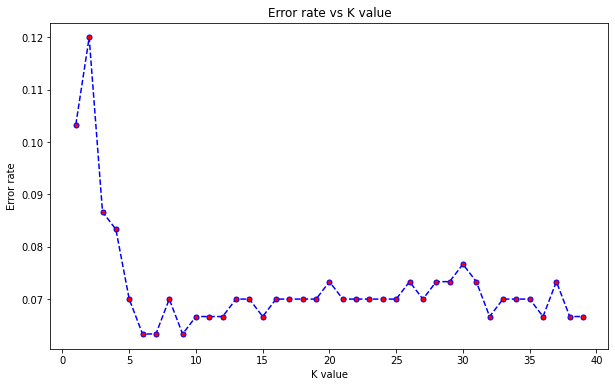

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=5)
plt.title('Error rate vs K value')
plt.xlabel('K value')
plt.ylabel('Error rate')

In [ ]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(xtr,ytr)
ypr=knn.predict(xte)
print(confusion_matrix(yte,ypr))
print(classification_report(ypr,yte))

[[131   9]
 [ 10 150]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       141
           1       0.94      0.94      0.94       159

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

